# Exploratory Data Analysis for the Forest Cover Dataset

## Dataset Description
The Forest Cover Dataset (https://archive.ics.uci.edu/ml/datasets/covertype) contains 581,012 samples and 55 attributes. It contains information like tree type, distance to nearby landmarks (e.g. roadways, surface water), soil type, local topography, and shadow coverage. Using this information, we have to predict the forest cover type for any new observation. In this report, we will perform EDA on our dataset to get a deeper understanding of the different attributes such as their distributions, correlations, etc.

## Import Libraries

In [19]:
library(readr)
library(corrplot)
library(caret)
library(ggplot2)
library(scales)
library(plyr)
library(class)
library(mlbench)
library(sm)
library(devtools)
library(grid)
library(gridExtra)
library(dplyr)
library(purrr)
library(tidyr)

## Load Data

In [20]:
covtype_data <- read_csv("covtype.csv", col_names = FALSE)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




In [21]:
dim(covtype_data)

[1] 581012     55

In [22]:
head(covtype_data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


## Check for missing values

In [23]:
any(is.na(covtype_data))

[1] FALSE

There are no missing values in the dataset.

## Preprocessing Data
Since the dataset does not have any column names, we will assign some according to the description provided.

In [24]:
names(covtype_data) <- c("Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
                         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
                         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
                         "Horizontal_Distance_To_Fire_Points", "Rawah", "Neota", 
                         "Comanche Peak", "Cache la Poudre", 
                         "2702", "2703", "2704", "2705", "2706", "2717", "3501", "3502", 
                         "4201", "4703", "4704", "4744", "4758", "5101", "5151", "6101", 
                         "6102", "6731", "7101", "7102", "7103", "7201", "7202", "7700", 
                         "7701", "7702", "7709", "7710", "7745", "7746", "7755", "7756", 
                         "7757", "7790", "8703", "8707", "8708", "8771", "8772", "8776", "Cover_Type")

The 4 digit numbers above correspond to the Soil Types as given in the dataset description.

Next, we will combine the 40 Soil Types into one column. Similarly, we will combine the 4 Wilderness Areas into one column.

In [25]:
covtype_data$Soil_Type <- names(covtype_data[, 15:54])[max.col(covtype_data[, 15:54])]
covtype_data$Wilderness_Area <- names(covtype_data[, 11:14])[max.col(covtype_data[, 11:14])]

covtype_data <- covtype_data[, -15:-54]
covtype_data <- covtype_data[, -11:-14]

Next, we will check the structure of the data.

In [26]:
str(covtype_data)

tibble [581,012 x 13] (S3: tbl_df/tbl/data.frame)
 $ Elevation                         : num [1:581012] 2596 2590 2804 2785 2595 ...
 $ Aspect                            : num [1:581012] 51 56 139 155 45 132 45 49 45 59 ...
 $ Slope                             : num [1:581012] 3 2 9 18 2 6 7 4 9 10 ...
 $ Horizontal_Distance_To_Hydrology  : num [1:581012] 258 212 268 242 153 300 270 234 240 247 ...
 $ Vertical_Distance_To_Hydrology    : num [1:581012] 0 -6 65 118 -1 -15 5 7 56 11 ...
 $ Horizontal_Distance_To_Roadways   : num [1:581012] 510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade_9am                     : num [1:581012] 221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade_Noon                    : num [1:581012] 232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade_3pm                     : num [1:581012] 148 151 135 122 150 140 138 144 133 124 ...
 $ Horizontal_Distance_To_Fire_Points: num [1:581012] 6279 6225 6121 6211 6172 ...
 $ Cover_Type                      

We need to change the data type of Cover Type, Soil Type, and Wilderness Area to factor.

In [27]:
covtype_data$Cover_Type <- as.factor(covtype_data$Cover_Type)
covtype_data$Soil_Type <- as.factor(covtype_data$Soil_Type)
covtype_data$Wilderness_Area <- as.factor(covtype_data$Wilderness_Area)

Now, let’s see how our dataset looks like after preprocessing.

In [29]:
dim(covtype_data)

[1] 581012     13

In [30]:
head(covtype_data)

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
2596,51,3,258,0,510,221,232,148,6279,5,7745,Rawah
2590,56,2,212,-6,390,220,235,151,6225,5,7745,Rawah
2804,139,9,268,65,3180,234,238,135,6121,2,4744,Rawah
2785,155,18,242,118,3090,238,238,122,6211,2,7746,Rawah
2595,45,2,153,-1,391,220,234,150,6172,5,7745,Rawah
2579,132,6,300,-15,67,230,237,140,6031,2,7745,Rawah


In [31]:
str(covtype_data)

tibble [581,012 x 13] (S3: tbl_df/tbl/data.frame)
 $ Elevation                         : num [1:581012] 2596 2590 2804 2785 2595 ...
 $ Aspect                            : num [1:581012] 51 56 139 155 45 132 45 49 45 59 ...
 $ Slope                             : num [1:581012] 3 2 9 18 2 6 7 4 9 10 ...
 $ Horizontal_Distance_To_Hydrology  : num [1:581012] 258 212 268 242 153 300 270 234 240 247 ...
 $ Vertical_Distance_To_Hydrology    : num [1:581012] 0 -6 65 118 -1 -15 5 7 56 11 ...
 $ Horizontal_Distance_To_Roadways   : num [1:581012] 510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade_9am                     : num [1:581012] 221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade_Noon                    : num [1:581012] 232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade_3pm                     : num [1:581012] 148 151 135 122 150 140 138 144 133 124 ...
 $ Horizontal_Distance_To_Fire_Points: num [1:581012] 6279 6225 6121 6211 6172 ...
 $ Cover_Type                      

## Descriptive statistics

In [33]:
summary(covtype_data)

   Elevation        Aspect          Slope      Horizontal_Distance_To_Hydrology
 Min.   :1859   Min.   :  0.0   Min.   : 0.0   Min.   :   0.0                  
 1st Qu.:2809   1st Qu.: 58.0   1st Qu.: 9.0   1st Qu.: 108.0                  
 Median :2996   Median :127.0   Median :13.0   Median : 218.0                  
 Mean   :2959   Mean   :155.7   Mean   :14.1   Mean   : 269.4                  
 3rd Qu.:3163   3rd Qu.:260.0   3rd Qu.:18.0   3rd Qu.: 384.0                  
 Max.   :3858   Max.   :360.0   Max.   :66.0   Max.   :1397.0                  
                                                                               
 Vertical_Distance_To_Hydrology Horizontal_Distance_To_Roadways Hillshade_9am  
 Min.   :-173.00                Min.   :   0                    Min.   :  0.0  
 1st Qu.:   7.00                1st Qu.:1106                    1st Qu.:198.0  
 Median :  30.00                Median :1997                    Median :218.0  
 Mean   :  46.42                Mean   :

One intersting thing to note is that the Vertical_Distance_To_Hydrology attribute has negative value(s). We will further explore this in the Outliers section.

## Class Distribution

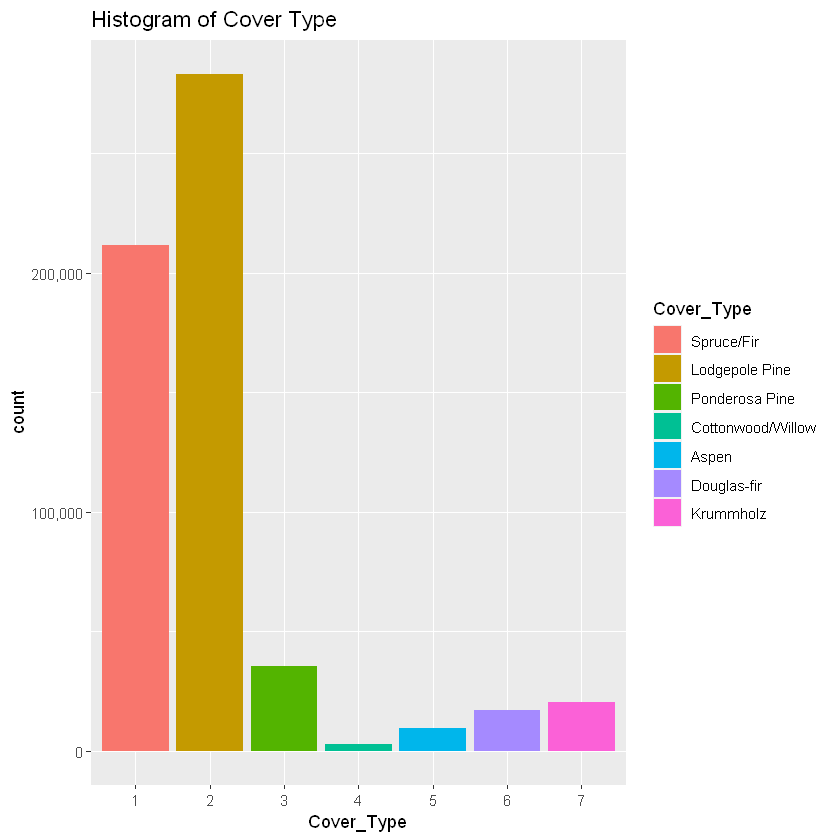

In [34]:
ggplot(covtype_data, aes(Cover_Type, fill=Cover_Type)) +
ggtitle("Histogram of Cover Type") +
geom_bar() +
scale_y_continuous(labels = comma) +
scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                    labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))

We can see that the data is highly imbalanced: majority of the samples belong to either cover type 1 or cover type 2.

## Detecting Outliers

For continuous variables, we will be using boxplots to detect outliers. All points located outside the fences of the boxplot (i.e. <Q1−1.5∗IQR or >Q3+1.5∗IQR) are considered to be outliers. The number of outliers for each attribute (by Cover Type) are given below the plots.

Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


[1] "Number of outliers"
[1] "Cover type 1: 3931"
[1] "Cover type 2: 838"
[1] "Cover type 3: 0"
[1] "Cover type 4: 0"
[1] "Cover type 5: 181"
[1] "Cover type 6: 442"
[1] "Cover type 7: 839"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


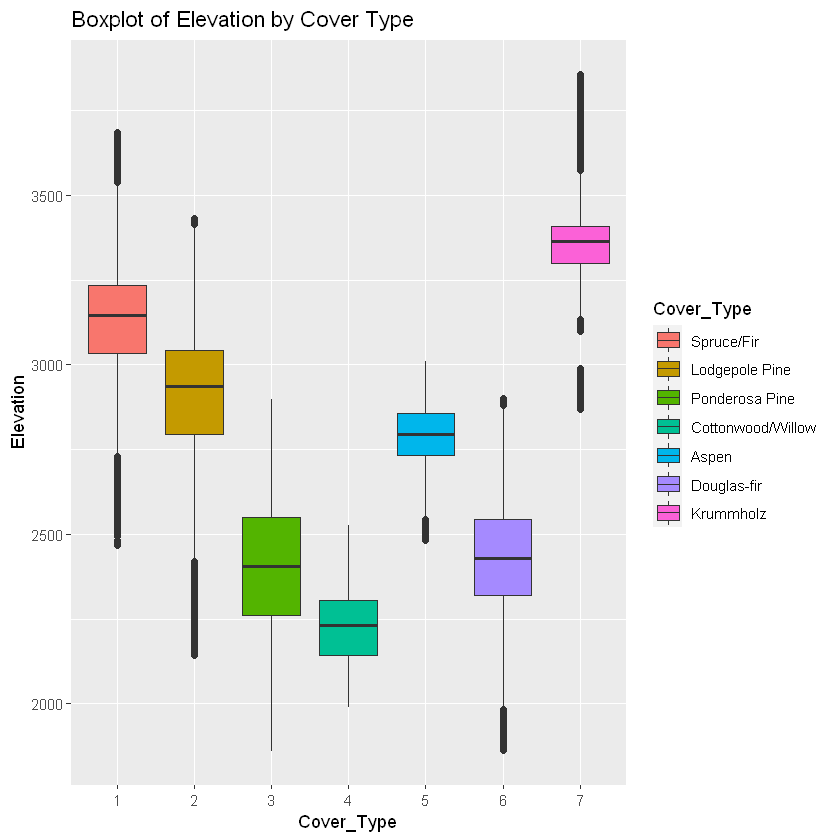

[1] "Number of outliers"
[1] "Cover type 1: 0"
[1] "Cover type 2: 0"
[1] "Cover type 3: 0"
[1] "Cover type 4: 325"
[1] "Cover type 5: 0"
[1] "Cover type 6: 0"
[1] "Cover type 7: 0"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


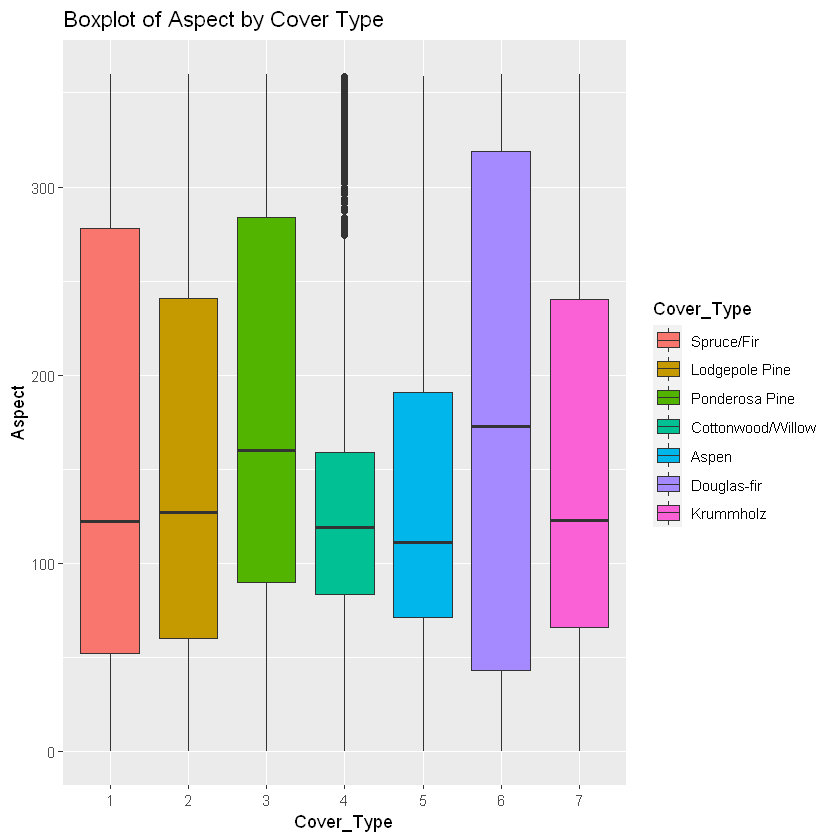

[1] "Number of outliers"
[1] "Cover type 1: 3704"
[1] "Cover type 2: 3189"
[1] "Cover type 3: 23"
[1] "Cover type 4: 0"
[1] "Cover type 5: 31"
[1] "Cover type 6: 12"
[1] "Cover type 7: 717"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


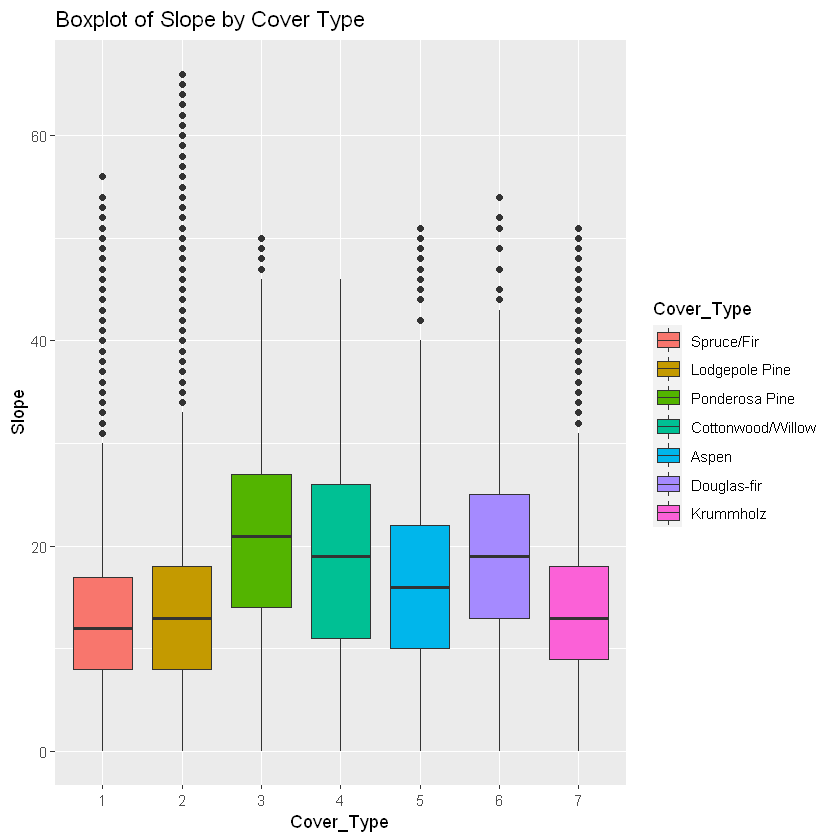

[1] "Number of outliers"
[1] "Cover type 1: 3245"
[1] "Cover type 2: 7049"
[1] "Cover type 3: 183"
[1] "Cover type 4: 42"
[1] "Cover type 5: 317"
[1] "Cover type 6: 153"
[1] "Cover type 7: 275"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


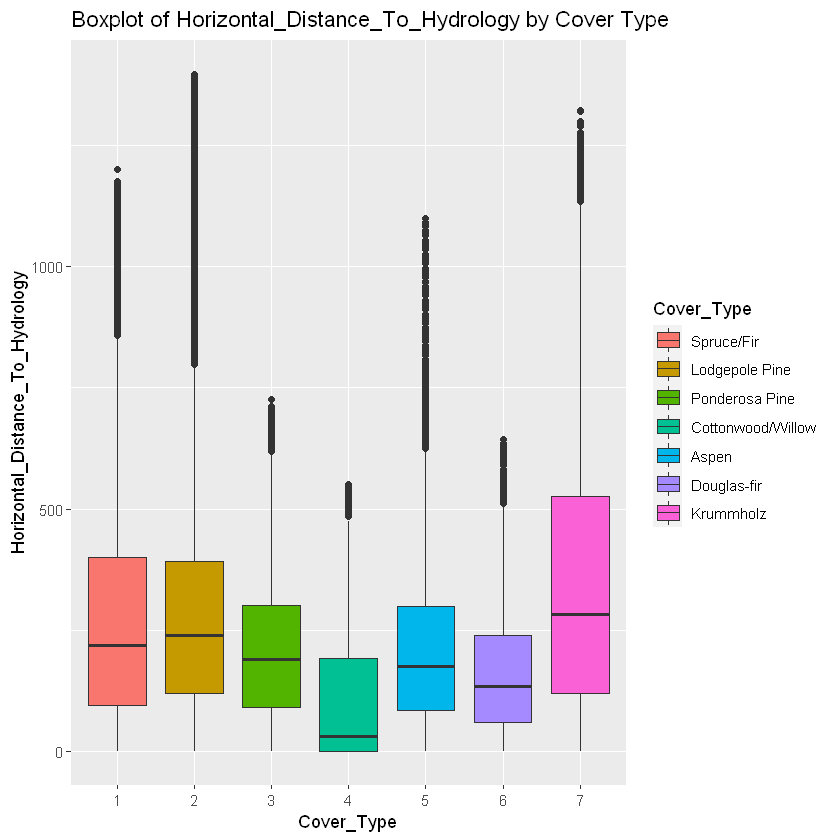

[1] "Number of outliers"
[1] "Cover type 1: 12804"
[1] "Cover type 2: 16651"
[1] "Cover type 3: 853"
[1] "Cover type 4: 83"
[1] "Cover type 5: 299"
[1] "Cover type 6: 339"
[1] "Cover type 7: 763"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


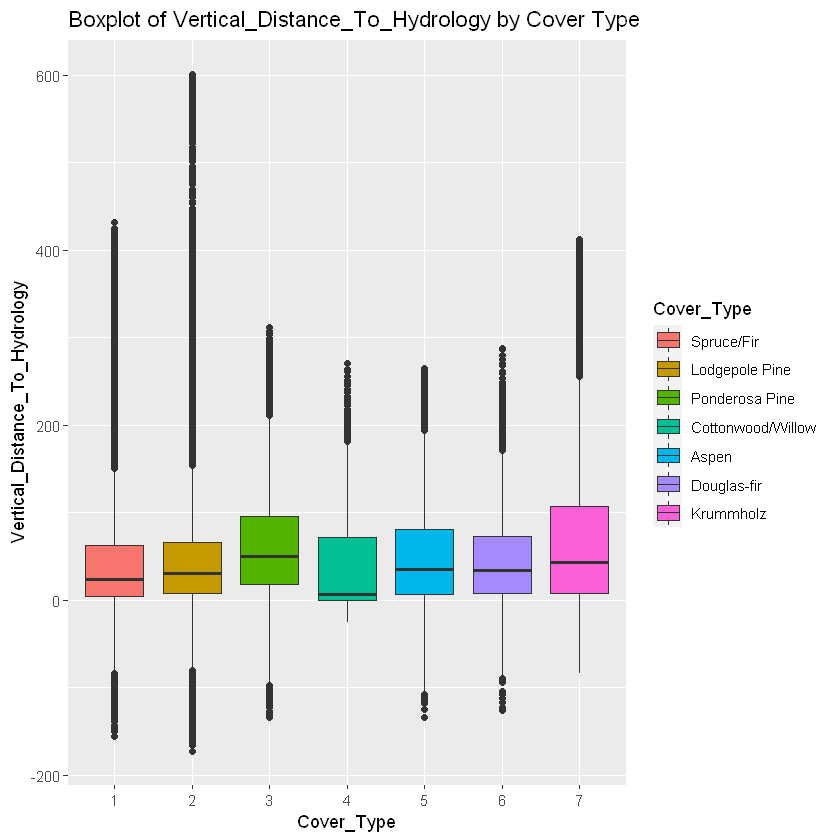

[1] "Number of outliers"
[1] "Cover type 1: 0"
[1] "Cover type 2: 299"
[1] "Cover type 3: 716"
[1] "Cover type 4: 0"
[1] "Cover type 5: 347"
[1] "Cover type 6: 113"
[1] "Cover type 7: 0"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


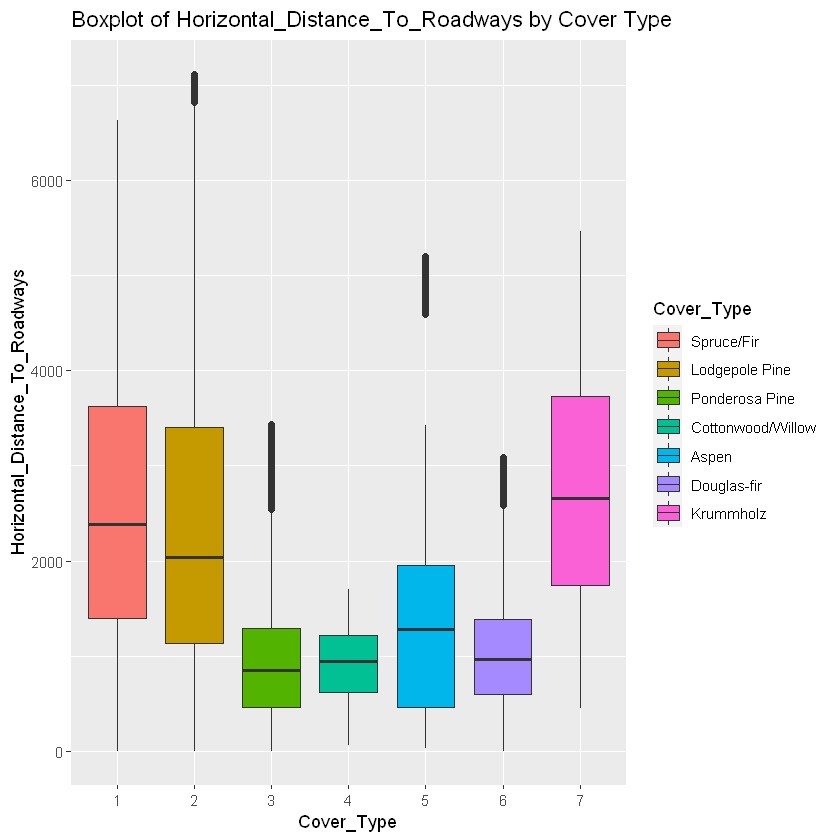

[1] "Number of outliers"
[1] "Cover type 1: 5699"
[1] "Cover type 2: 8094"
[1] "Cover type 3: 78"
[1] "Cover type 4: 51"
[1] "Cover type 5: 194"
[1] "Cover type 6: 14"
[1] "Cover type 7: 288"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


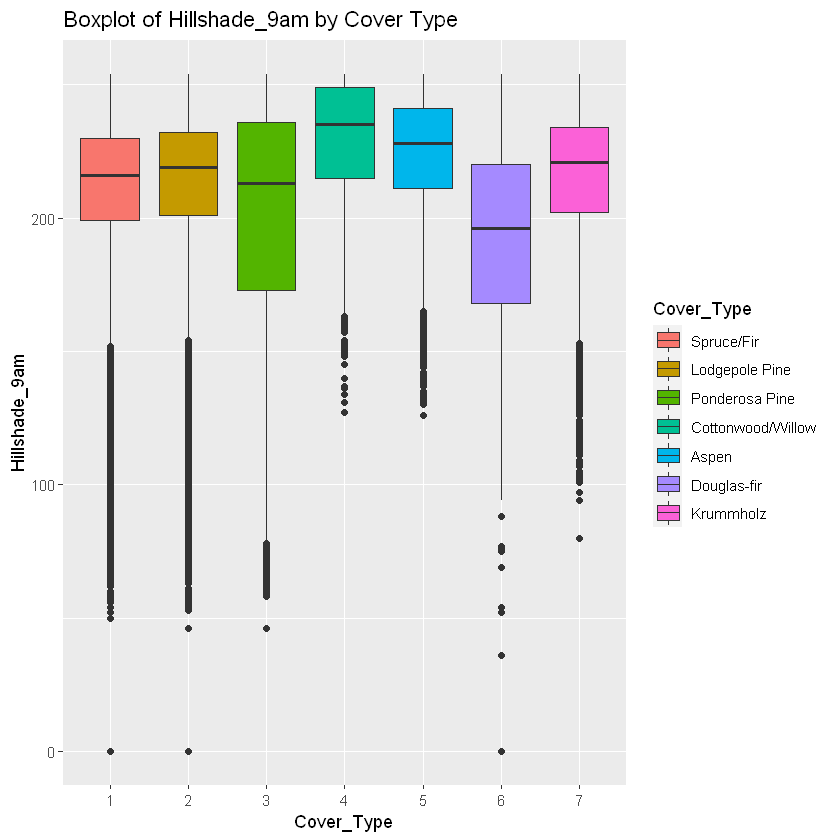

[1] "Number of outliers"
[1] "Cover type 1: 5060"
[1] "Cover type 2: 5619"
[1] "Cover type 3: 510"
[1] "Cover type 4: 37"
[1] "Cover type 5: 97"
[1] "Cover type 6: 283"
[1] "Cover type 7: 559"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


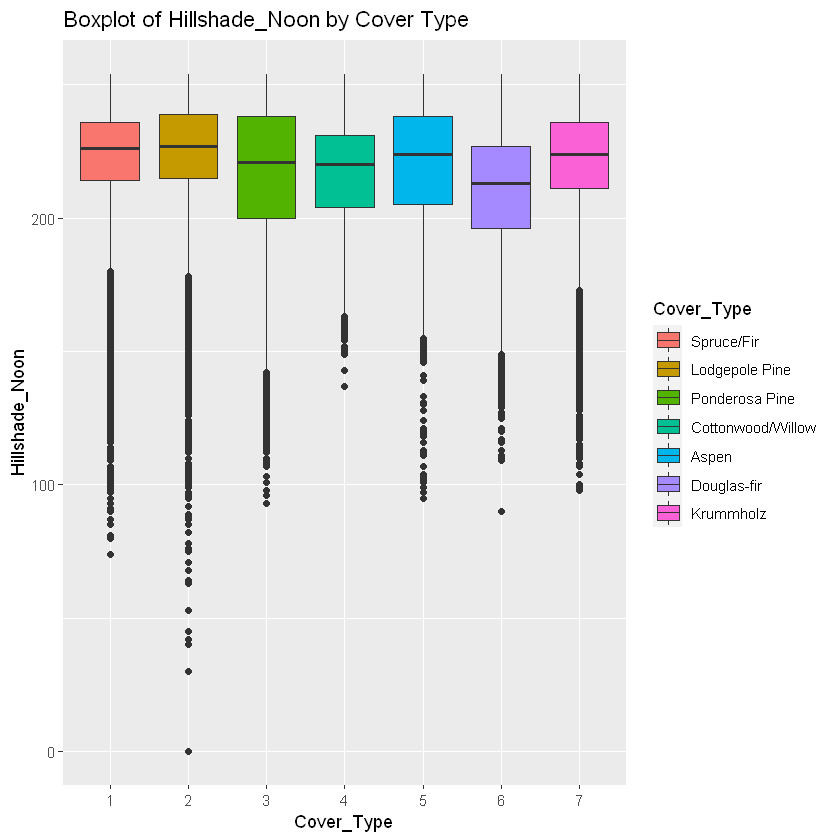

[1] "Number of outliers"
[1] "Cover type 1: 2283"
[1] "Cover type 2: 3559"
[1] "Cover type 3: 0"
[1] "Cover type 4: 0"
[1] "Cover type 5: 0"
[1] "Cover type 6: 3"
[1] "Cover type 7: 513"


Warning message:
"Use of `covtype_data[[i]]` is discouraged. Use `.data[[i]]` instead."


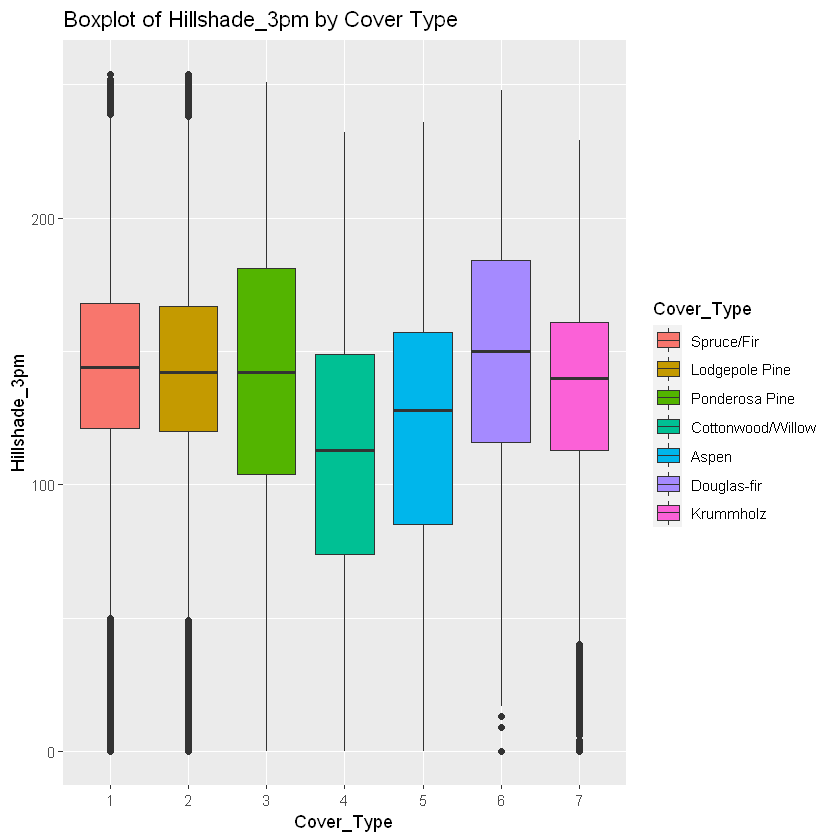

[1] "Number of outliers"
[1] "Cover type 1: 7420"
[1] "Cover type 2: 22090"
[1] "Cover type 3: 1027"
[1] "Cover type 4: 0"
[1] "Cover type 5: 323"
[1] "Cover type 6: 586"
[1] "Cover type 7: 0"


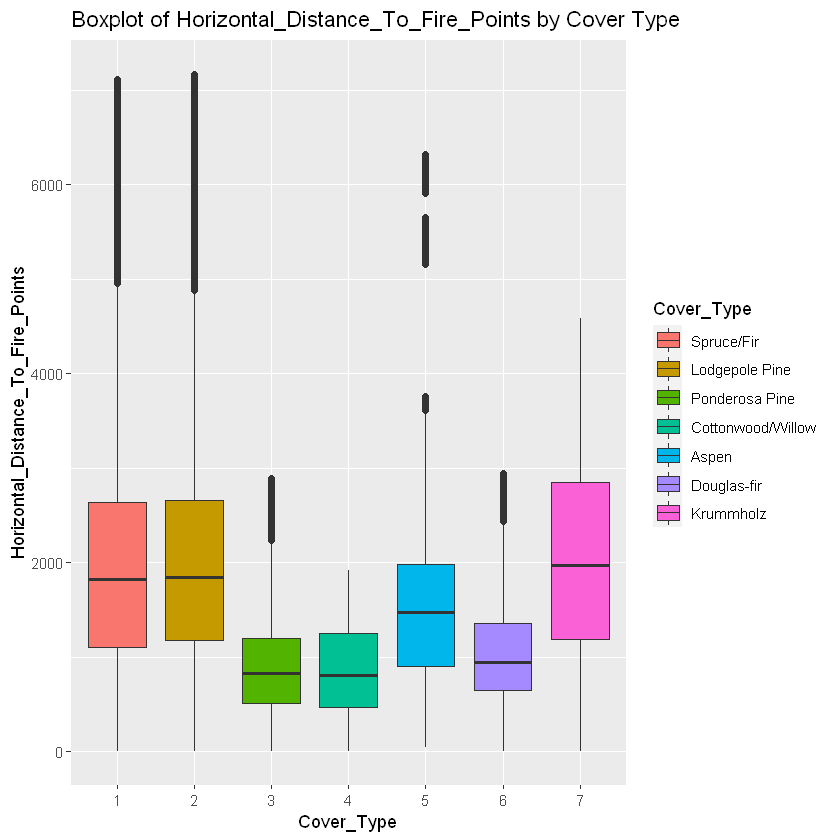

In [35]:
for (i in colnames(covtype_data)[1:10]) {
  bp <- ggplot(covtype_data, aes(x=Cover_Type, y=covtype_data[[i]], fill=Cover_Type)) +
    geom_boxplot() +
    ggtitle(paste0("Boxplot of ", i, " by Cover Type")) +
    ylab(i) +
    scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                        labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))
  print(bp)
  
  bp2 <- boxplot(covtype_data[[i]] ~ covtype_data[["Cover_Type"]], plot = FALSE)
  print("Number of outliers")
  for (j in 1:7) {
    print(paste0("Cover type ", j, ": ", sum(bp2$group == j)))
  }
}

In some cases, the number of outliers is very high. But considering the fact that there are a lot of samples in our dataset, it makes sense. Also, looking at the Vertical_Distance_To_Hydrology boxplot, we can see that not all negative values are outliers i.e. the negative value could just be an indicator for the direction.

## Correlation
To calculate correlation of continuous variables with Cover Type, we will first have to convert the Cover Type variable into numerical data type using dummy variables.

In [36]:
new_df <- covtype_data
temp <- dummyVars(~ Cover_Type, data = new_df)
temp2 <- data.frame(predict(temp, new_df))
new_df[, 14:20] <- temp2
new_df <- new_df[, -11:-13]

Next, we will create a correlation matrix and then plot it. But due to the limited space, we first have to abbreviate the column names.

In [37]:
corr_matrix <- cor(new_df)
abbreviate(colnames(corr_matrix), minlength = 10)

Elevation                             Aspect 
                       "Elevation"                           "Aspect" 
                             Slope   Horizontal_Distance_To_Hydrology 
                           "Slope"                       "Hrzn_D_T_H" 
    Vertical_Distance_To_Hydrology    Horizontal_Distance_To_Roadways 
                      "Vrtc_D_T_H"                       "Hrzn_D_T_R" 
                     Hillshade_9am                     Hillshade_Noon 
                      "Hillshd_9m"                       "Hillshd_Nn" 
                     Hillshade_3pm Horizontal_Distance_To_Fire_Points 
                      "Hllshd_3pm"                       "Hr_D_T_F_P" 
                      Cover_Type.1                       Cover_Type.2 
                      "Covr_Typ.1"                       "Covr_Typ.2" 
                      Cover_Type.3                       Cover_Type.4 
                      "Covr_Typ.3"                       "Covr_Typ.4" 
                      Cover_Type.5                       Cover_Type.6 
                      "Covr_Typ.5"                       "Covr_Typ.6" 
                      Cover_Type.7 
                      "Covr_Typ.7"

In [39]:
colnames(corr_matrix) <- abbreviate(colnames(corr_matrix), minlength = 10)
row.names(corr_matrix) <- abbreviate(row.names(corr_matrix), minlength = 10)

In [40]:
round(corr_matrix, 2)

,Elevation,Aspect,Slope,Hrzn_D_T_H,Vrtc_D_T_H,Hrzn_D_T_R,Hillshd_9m,Hillshd_Nn,Hllshd_3pm,Hr_D_T_F_P,Covr_Typ.1,Covr_Typ.2,Covr_Typ.3,Covr_Typ.4,Covr_Typ.5,Covr_Typ.6,Covr_Typ.7
Elevation,1.00,0.02,-0.24,0.31,0.09,0.37,0.11,0.21,0.06,0.15,0.46,-0.13,-0.52,-0.18,-0.08,-0.34,0.28
Aspect,0.02,1.00,0.08,0.02,0.07,0.03,-0.58,0.34,0.65,-0.11,0.00,-0.03,0.05,-0.01,-0.02,0.04,0.00
Slope,-0.24,0.08,1.00,-0.01,0.27,-0.22,-0.33,-0.53,-0.18,-0.19,-0.10,-0.07,0.23,0.04,0.04,0.12,0.00
Hrzn_D_T_H,0.31,0.02,-0.01,1.00,0.61,0.07,-0.03,0.05,0.05,0.05,0.00,0.05,-0.07,-0.05,-0.03,-0.09,0.08
Vrtc_D_T_H,0.09,0.07,0.27,0.61,1.00,-0.05,-0.17,-0.11,0.03,-0.07,-0.06,-0.01,0.07,-0.01,0.01,0.00,0.08
Hrzn_D_T_R,0.37,0.03,-0.22,0.07,-0.05,1.00,0.03,0.19,0.11,0.33,0.13,0.05,-0.23,-0.06,-0.08,-0.15,0.05
Hillshd_9m,0.11,-0.58,-0.33,-0.03,-0.17,0.03,1.00,0.01,-0.78,0.13,0.00,0.06,-0.10,0.04,0.05,-0.13,0.03
Hillshd_Nn,0.21,0.34,-0.53,0.05,-0.11,0.19,0.01,1.00,0.59,0.06,0.00,0.10,-0.10,-0.02,-0.03,-0.12,-0.02
Hllshd_3pm,0.06,0.65,-0.18,0.05,0.03,0.11,-0.78,0.59,1.00,-0.05,0.03,0.01,-0.01,-0.06,-0.07,0.03,-0.04
Hr_D_T_F_P,0.15,-0.11,-0.19,0.05,-0.07,0.33,0.13,0.06,-0.05,1.00,0.02,0.14,-0.21,-0.06,-0.04,-0.12,0.01


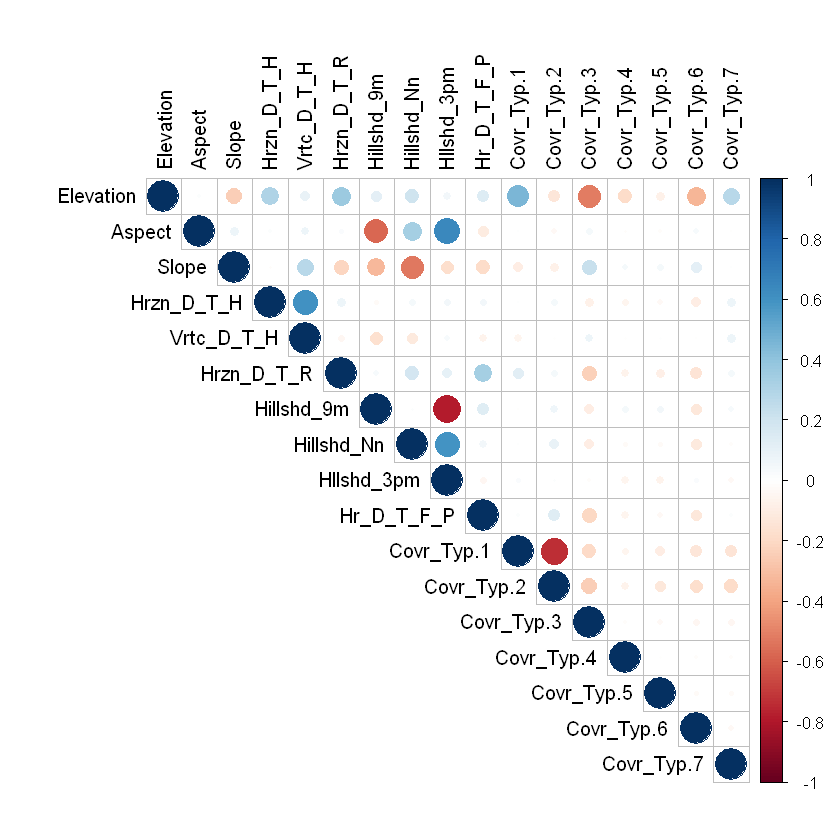

In [41]:
corrplot(corr_matrix, type = "upper", tl.col = "black",)

From the plot, we can see that Elevation is the most correlated to Cover Type out of all the continuous variables. Other noticeable variables with comparatively high correlation with the Cover Type include Slope and Horizontal_Distance_To_Roadways. OVerall, we can say that the predictor and response variables are not highly correlated.

Other interesting thing to note is that Hillshade_3pm and Hillshade_9am are highly correlated which means that we can perform feature engineering when building the models in the future. Hillshade_3pm also has a high correlation with Aspect.

For categorical variables, we will be using contingency tables to check the correlation. To easily comprehend the table, we will be using proportions to generate the tables instead of frequency. Also, we will plot bar charts to view the data.

First, we will examine the Soil Type variable with Cover Type.

In [42]:
tbl1 = table(covtype_data$Cover_Type, covtype_data$Soil_Type) 
round(addmargins(prop.table(tbl1)), 2)

,2702,2703,2704,2705,2706,2717,3501,3502,4201,4703,...,7756,7757,7790,8703,8707,8708,8771,8772,8776,Sum
1,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0.00,...,0.04,0.03,0,0,0,0,0.02,0.01,0.01,0.36
2,0.00,0.00,0.00,0.01,0,0.00,0,0,0,0.02,...,0.05,0.04,0,0,0,0,0.00,0.00,0.00,0.49
3,0.00,0.01,0.00,0.01,0,0.01,0,0,0,0.02,...,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.06
4,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0.00,...,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0.00,...,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.02
6,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0.02,...,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.03
7,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0.00,...,0.00,0.00,0,0,0,0,0.01,0.01,0.01,0.04
Sum,0.01,0.01,0.01,0.02,0,0.01,0,0,0,0.06,...,0.09,0.08,0,0,0,0,0.03,0.02,0.02,1.00


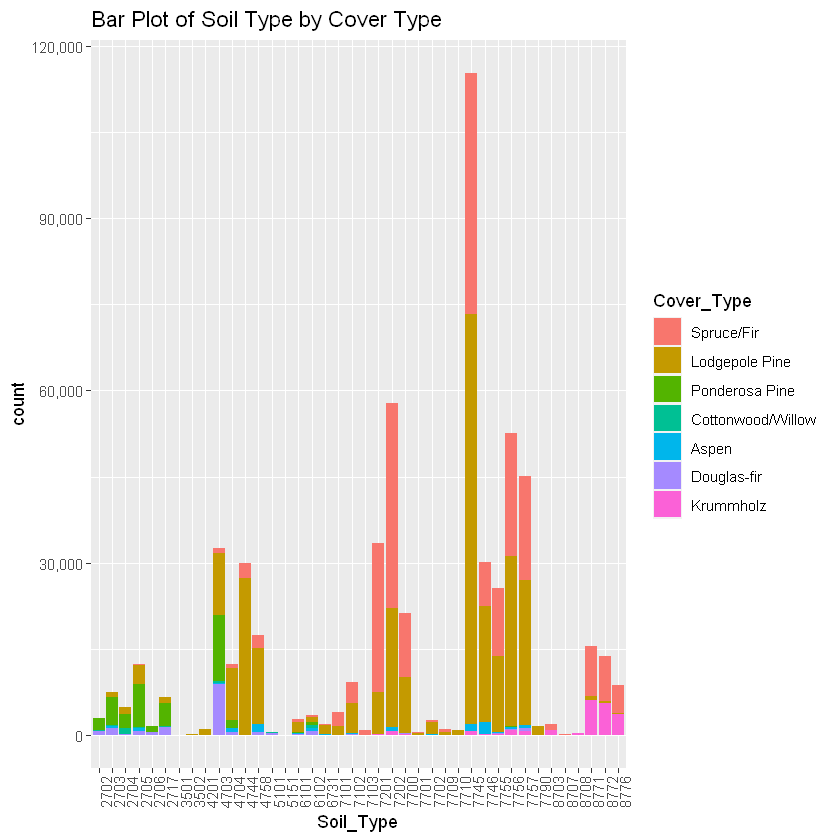

In [43]:
ggplot(covtype_data, aes(Soil_Type, fill=Cover_Type)) +
ggtitle("Bar Plot of Soil Type by Cover Type") +
geom_bar() +
scale_y_continuous(labels = comma) +
scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                    labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz")) +
theme(axis.text.x = element_text(angle=90, hjust=1))

We will perform Chi-squared test to check whether Cover_Type and Soil_Type are independent variables.

In [44]:
chisq.test(tbl1)

Warning message in chisq.test(tbl1):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tbl1
X-squared = 762247, df = 234, p-value < 2.2e-16


Since the p-value is less than the significance level (0.05), we can conclude that the two variables are not independent.

We will repeat the above steps for the Wilderness Area variable since it is a categorical variable as well.

In [45]:
tbl2 = table(covtype_data$Cover_Type, covtype_data$Wilderness_Area) 
round(addmargins(prop.table(tbl2)), 2)

,Cache la Poudre,Comanche Peak,Neota,Rawah,Sum
1,0.00,0.15,0.03,0.18,0.36
2,0.01,0.22,0.02,0.25,0.49
3,0.04,0.02,0.00,0.00,0.06
4,0.00,0.00,0.00,0.00,0.00
5,0.00,0.01,0.00,0.01,0.02
6,0.02,0.01,0.00,0.00,0.03
7,0.00,0.02,0.00,0.01,0.04
Sum,0.06,0.44,0.05,0.45,1.00


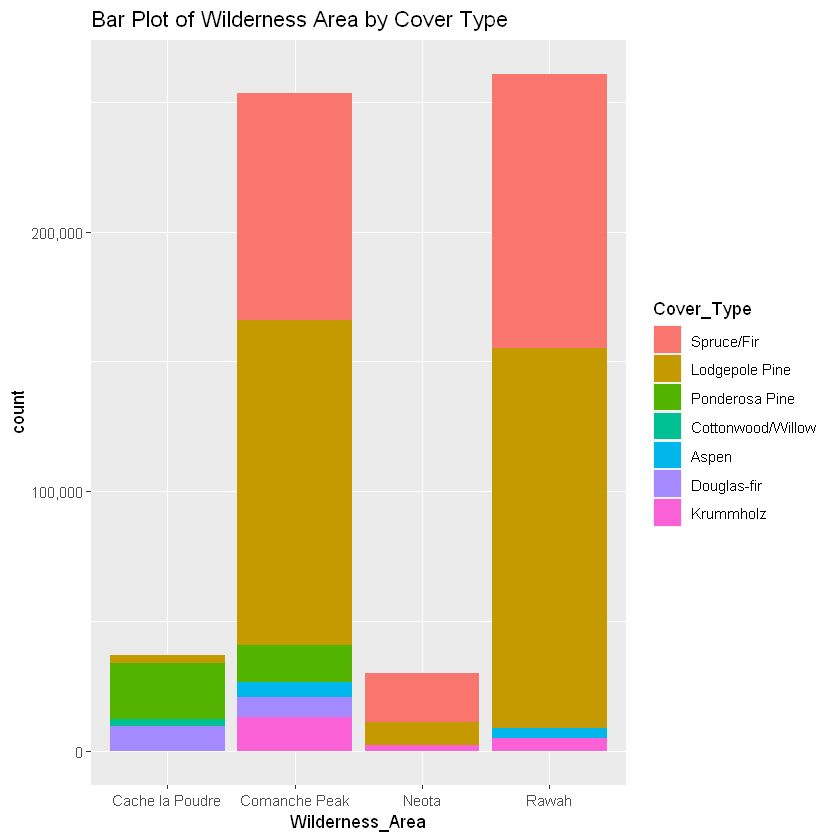

In [46]:
ggplot(covtype_data, aes(Wilderness_Area, fill=Cover_Type)) +
ggtitle("Bar Plot of Wilderness Area by Cover Type") +
geom_bar() +
scale_y_continuous(labels = comma) +
scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                    labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))

Performing Chi-squared test to check whether Cover_Type and Wilderness Area are independent variables.

In [47]:
chisq.test(tbl2)


	Pearson's Chi-squared test

data:  tbl2
X-squared = 342443, df = 18, p-value < 2.2e-16


Again, the p-value is less than the significance level which indicates that the two variables are not independent.

## Histogram and Density Plots

We will plot the histogram and density plots for all the continuous variables in the dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



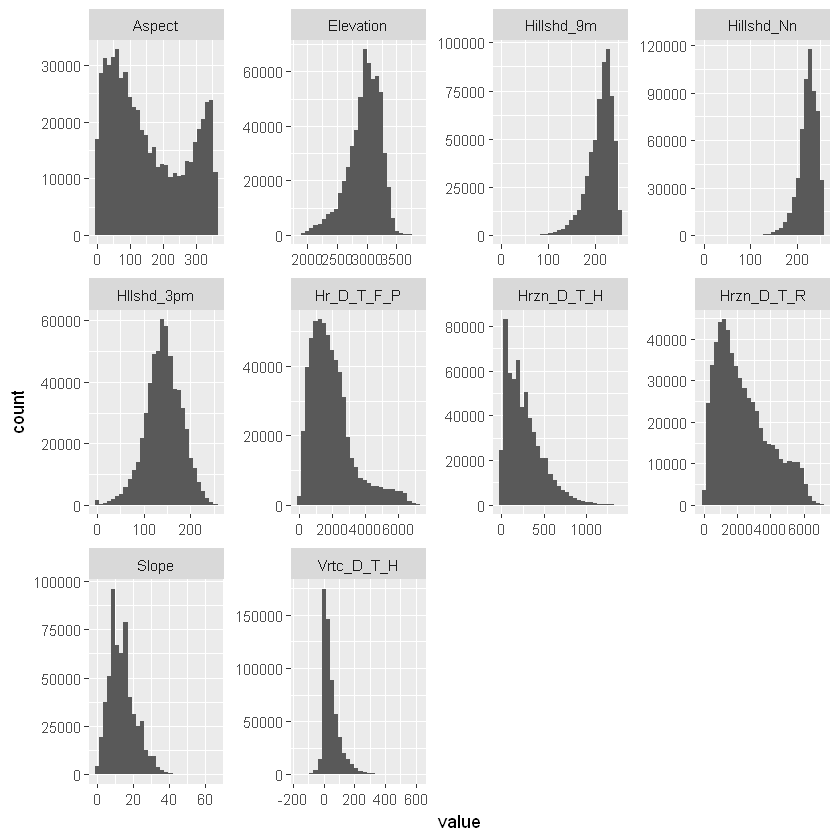

In [48]:
abbr_df <- covtype_data
colnames(abbr_df) <- abbreviate(colnames(abbr_df), minlength = 10)

abbr_df %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram()

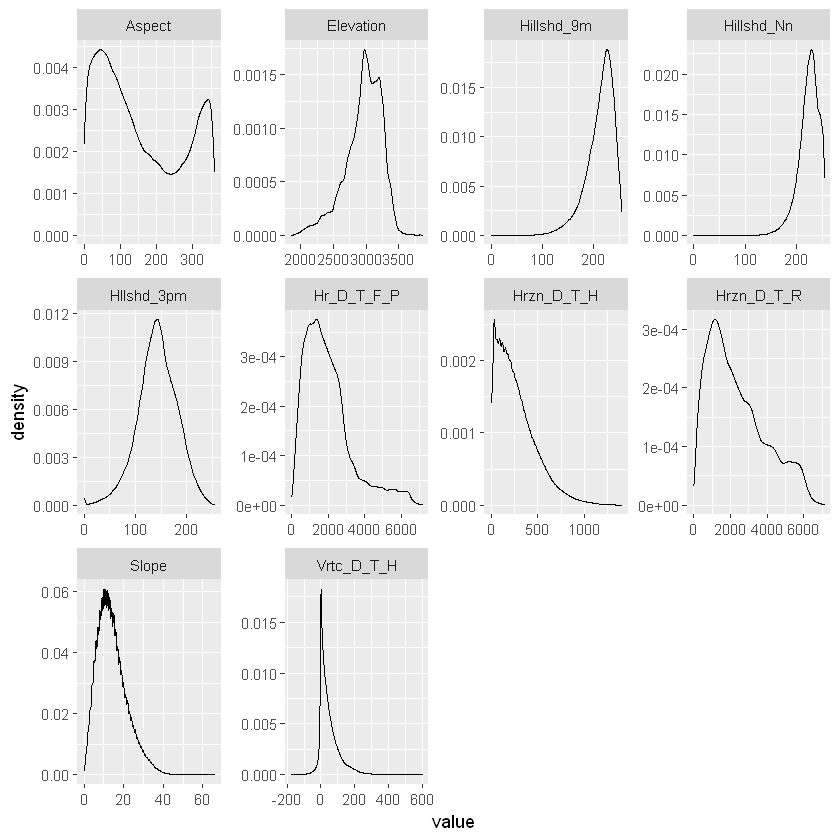

In [49]:
abbr_df %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_density()

From the above plots, we can extract the following information:

- The data for Vertical_Distance_To_Hydrology column is mostly concentrated in values between 0-100.

- Aspect variable follows a bimodal distribution.

- Rest of the variables loosely follow a normal distribution.

- Hillshade_9am and Hillshade_Noon have almost the same distribution of values. They are both negatively skewed.

- Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points, and Slope distributions are positively skewed.

Next, we will examine the density plot of Elevation by Cover Type since they had a high correlation.

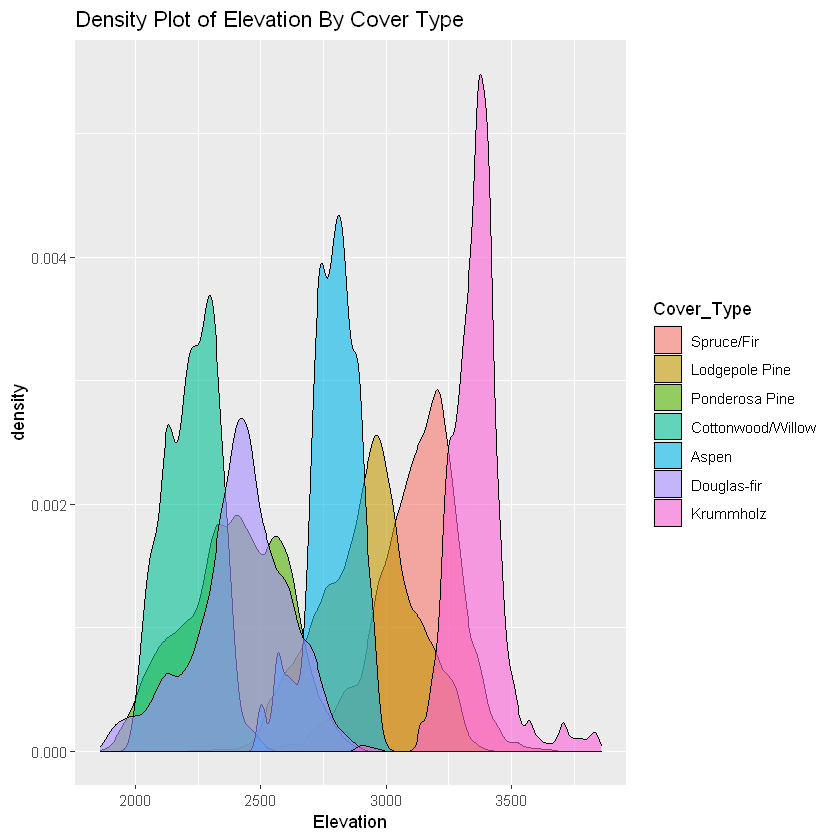

In [50]:
ggplot(covtype_data, aes(x=Elevation, fill=Cover_Type)) +
geom_density(alpha = 0.6) +
labs(title="Density Plot of Elevation By Cover Type") +
scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                    labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))

Analysis of the above plot shows that Elevation could be an important factor in determing the Cover Type. We can see that Krummholz, Aspen and Ponderosa Pine cover types have narrow distributions whereas the other 4 cover types are more spread out in terms of Elevation.

Next, we explore the density plot of Wilderness Area by Cover Type.

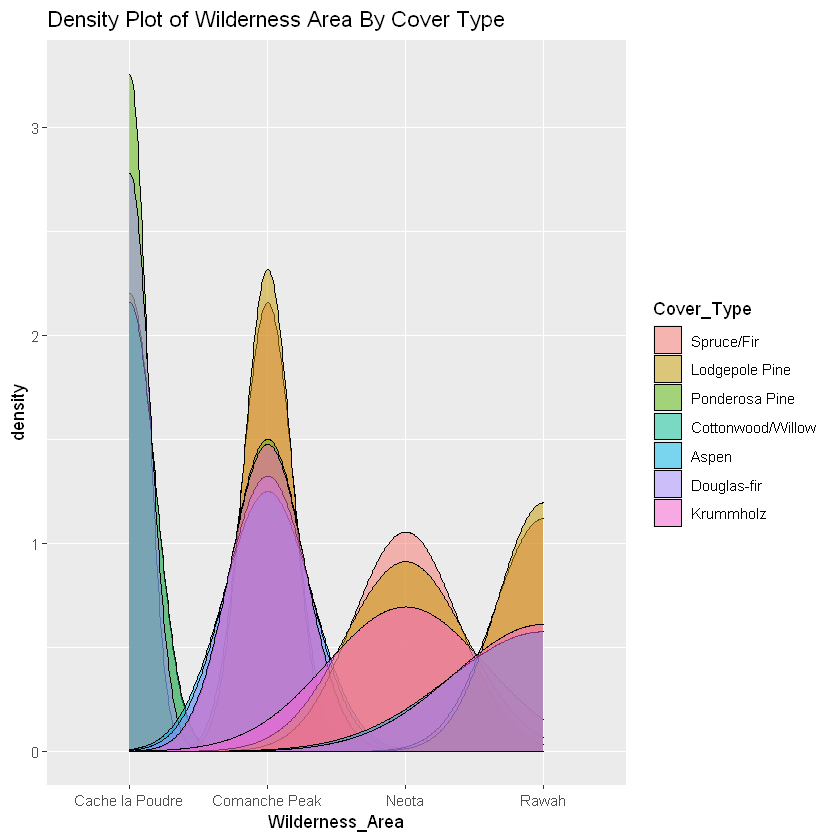

In [51]:
ggplot(covtype_data, aes(x=Wilderness_Area, fill=Cover_Type)) +
  geom_density(alpha = 0.5) +
  labs(title="Density Plot of Wilderness Area By Cover Type") +
  scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                      labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))

The above plot shows us that Lodgepole Pine is distributed amongst all areas except for Cache la Poudre. On the other hand, Cottonwood/Wilson is limited to just Cache la Poudre. Douglas-fir is evenly distributed in Comanche Peak in addition to exisiting in Rawah and Neota in low density.

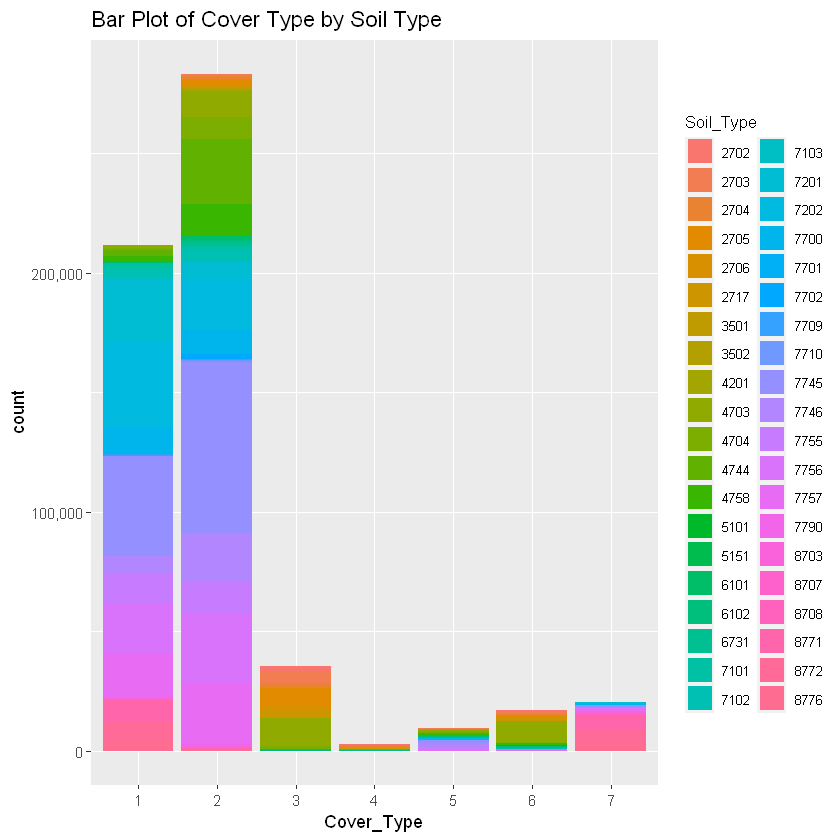

In [52]:
ggplot(covtype_data, aes(Cover_Type, fill=Soil_Type)) +
  ggtitle("Bar Plot of Cover Type by Soil Type") +
  geom_bar(size = 1) +
  scale_y_continuous(labels = comma) +
  guides(shape = guide_legend(override.aes = list(size = 0.5))) +
  guides(color = guide_legend(override.aes = list(size = 0.5))) +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 8))

We can see that cover type 1 and 2 contain almost all kinds of soil which makes sense since their count is so high compared to others. Cover type 3 and 6 contain almost the same types of soil. Another interesting thing to note is that cover type 7 and 3 consist of completely different types of soil. This information can help us when building a classifier.

Finally, we will create a plot to visualise the relationship between Hydrology and Cover Type.

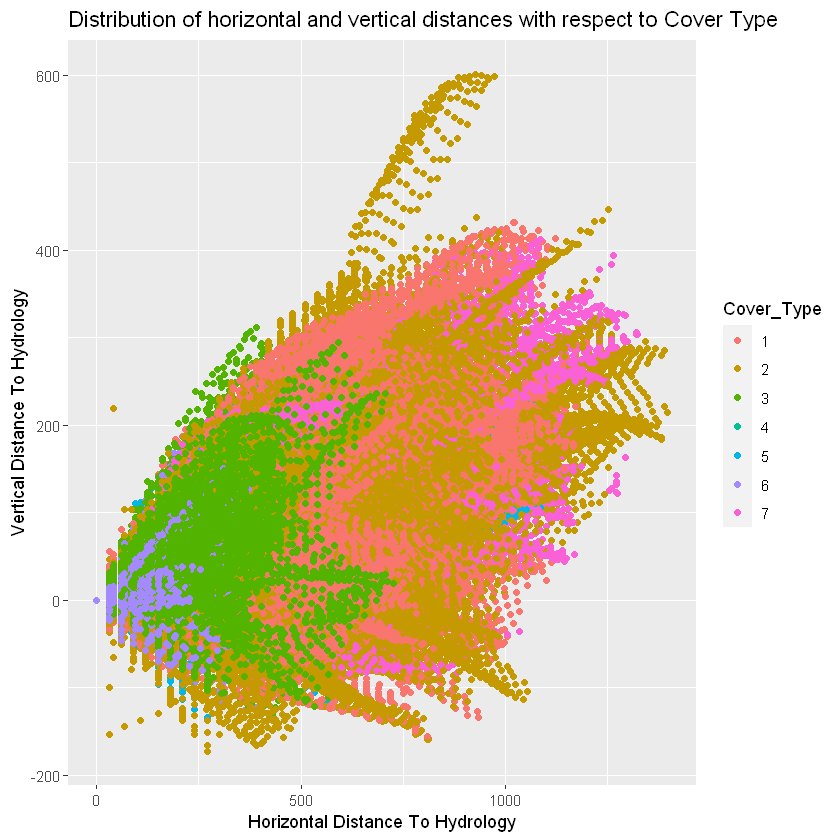

In [54]:
qplot(Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, data=covtype_data, color=Cover_Type, alpha=I(.5),
      main="Distribution of horizontal and vertical distances with respect to Cover Type", 
      xlab="Horizontal Distance To Hydrology",
      ylab="Vertical Distance To Hydrology") + 

geom_point() +
scale_fill_discrete(breaks=c("1", "2", "3", "4", "5", "6", "7"),
                    labels=c("Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"))

From the above plot, we can observe that Ponderosa Pine and Douglas-fir cover types are nearer to hydrology whereas Lodgepole Pine covers a wide range of distances. Another observation that we can make from this plot is that over 400 meters vertical distance to hydrology, only Lodgepole Pine cover type exists.